# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linearl

In [5]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1, 0],
              [1, 1]])
h = np.array([1, 0])
# h = A^{-1} * h
#beta = np.linalg.solve(A, h)
beta = np.linalg.inv(A).dot(h)
beta

array([ 1., -1.])

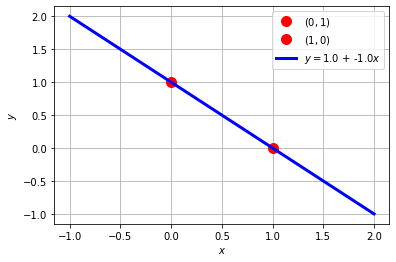

In [6]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6, 4))
plt.plot(0, 1, 'ro', ms=10, label='$(0, 1)$')
plt.plot(1, 0, 'ro', ms=10, label='$(1, 0)$')
x_num = np.linspace(-1, 2)
y_num = beta[0] + beta[1] * x_num
plt.plot(x_num, y_num, 'b', lw=3, 
         label=f'$y=${np.round(beta[0], 2)} + {np.round(beta[1], 2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [7]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1, -1, 1],
              [1, 0, 0],
              [1, 1, 1]])
h = np.array([1, 0, 1])

In [8]:
beta = np.linalg.solve(A, h)
beta

array([0., 0., 1.])

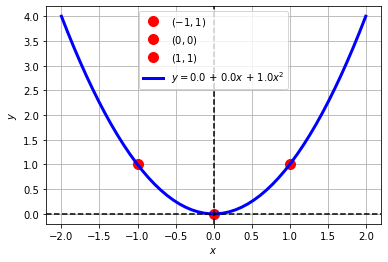

In [24]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6, 4))
plt.plot(-1, 1, 'ro', ms=10, label='$(-1, 1)$')
plt.plot(0, 0, 'ro', ms=10, label='$(0, 0)$')
plt.plot(1, 1, 'ro', ms=10, label='$(1, 1)$')
x_num = np.linspace(-2, 2)
y_num = beta[0] + beta[1] * x_num + beta[2] * x_num**2
plt.plot(x_num, y_num, 'b', lw=3, 
         label=f'$y=${np.round(beta[0], 2)} + {np.round(beta[1], 2)}$x$ + {np.round(beta[2], 2)}$x^2$')
plt.axvline(x=0, c='k', ls='--')
plt.axhline(y=0, c='k', ls='--')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [29]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N = 100
x = np.linspace(0, 10, N)
# y = ecn. recta + ruido
y = 10 + 2 * x + np.random.normal(loc=0, scale=2, size=(N,))

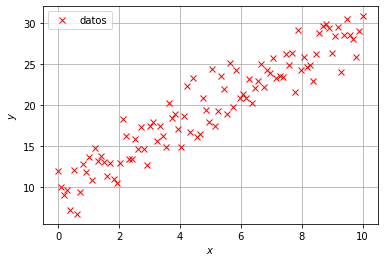

In [30]:
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'xr', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [31]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [32]:
# Función minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [33]:
# Definir funcion objetivo y punto inicial
def min_sq(beta, x_points, y_points):
    n = len(x_points)
    recta = beta[0] + beta[1] * x_points
    return (1 / (2 * n)) * ((y_points - recta)**2).sum()

In [34]:
beta_ini = [0, 0]

In [35]:
solucion = opt.minimize(fun=min_sq,
                        x0=beta_ini,
                        args=(x, y))

In [36]:
# Mostrar
solucion

      fun: 2.0460631610444215
 hess_inv: array([[ 3.90662356, -0.58300249],
       [-0.58300249,  0.11685317]])
      jac: array([ 1.93715096e-06, -3.27825546e-07])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([9.85226619, 1.98704794])

¿Qué tan bien luce el ajuste?

In [37]:
# Coeficientes \beta_0 y \beta_1
beta = solucion.x
beta

array([9.85226619, 1.98704794])

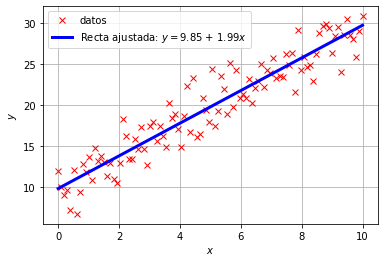

In [38]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'xr', label='datos')
y_fit = beta[0] + beta[1] * x
plt.plot(x, y_fit, 'b', lw=3, 
         label=f'Recta ajustada: $y=${np.round(beta[0], 2)} + {np.round(beta[1], 2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [41]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N = 100
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + np.random.normal(loc=0, scale=0.3, size=(N,))

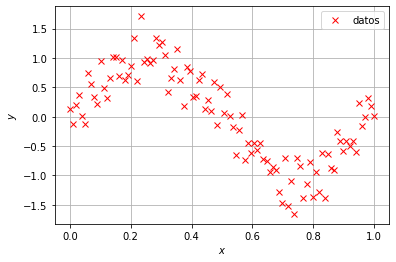

In [42]:
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'xr', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [43]:
# Definir funcion objetivo y semilla
def min_sq(beta, x_points, y_points):
    n = len(x_points)
    recta = beta[0] + beta[1] * x_points
    return (1 / (2 * n)) * ((y_points - recta)**2).sum()

beta_ini = [0, 0]

In [44]:
# Resolver
solucion = opt.minimize(fun=min_sq,
                        x0=beta_ini,
                        args=(x, y))

**Veamos $\beta$ para el ajuste con recta**

In [45]:
# Mostrar coeficientes
beta = solucion.x
beta

array([ 0.91735364, -1.81901276])

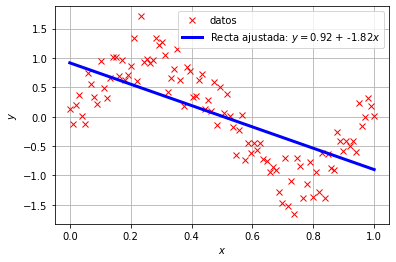

In [46]:
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'xr', label='datos')
y_fit = beta[0] + beta[1] * x
plt.plot(x, y_fit, 'b', lw=3, 
         label=f'Recta ajustada: $y=${np.round(beta[0], 2)} + {np.round(beta[1], 2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [ ]:
# Definir funcion objetivo y semilla


In [ ]:
# Resolver


**Veamos $\beta$ para el ajuste con parábola**

In [ ]:
# Mostrar coeficientes


In [ ]:
# Graficar recta y parabola ajustadas


### 2.3. Tampoco. Quizá un polinomio cúbico...

In [ ]:
# Definir funcion objetivo y semilla


In [ ]:
# Resolver


**Veamos $\beta$ para el ajuste con cúbica**

In [ ]:
# Mostrar coeficientes


In [ ]:
# Graficar recta, parabola y cubica


Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [ ]:
# Definimos funcion objetivo y semilla


In [ ]:
# Resolvemos


**De nuevo, veamos $\beta$**

In [ ]:
# Mostrar coeficientes


**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [ ]:
# Grafica de ajustes


Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [ ]:
# Error cuadratico


En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

Solucionamos el problema normalmente...

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

In [ ]:
def huber(a, d):
    if np.abs(a) <= d:
        return a**2
    else:
        return d * (2 * np.abs(a) - d)

Mejor...

## 5. Tarea

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 \$ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?

Abrir un nuevo notebook, llamado `Tarea3_ApellidoNombre` y subirlo a canvas en el espacio habilitado.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("housing_prices.csv")
x = data['size'].values
y = data['price'].values

# Avisos:

## Recordar tarea para hoy.

## Tarea para: definir fecha.

## Quiz la siguiente clase.

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Entregarme una hoja por equipo con los nombres de los integrantes ya.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para la siguiente semana, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alncance.
### 4. Fecha de entrega y presentación: Viernes 26 de febrero.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>